# Mushroom Classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).

The Target Class contains two values - 0 or 1 - where 0 refers to edible and 1 refers to poisonous. There are 24360 instances belonging to class 0 and 29675 belonging to class 1.

Twenty remaining variables (n: nominal, m: metrical)

1. cap-diameter (m): float number in cm

2. cap-shape (n): bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o

3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e

4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k

5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f

6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?

7. gill-spacing (n): close=c, distant=d, none=f

8. gill-color (n): see cap-color + none=f

9. stem-height (m): float number in cm

10. stem-width (m): float number in mm

11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r

12. stem-surface (n): see cap-surface + none=f

13. stem-color (n): see cap-color + none=f

14. veil-type (n): partial=p, universal=u

15. veil-color (n): see cap-color + none=f

16. has-ring (n): ring=t, none=f

17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?

18. spore-print-color (n): see cap color

19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d

20. season (n): spring=s, summer=u, autumn=a, winter=w

In [3]:
train = pd.read_csv("secondary_data.csv", sep=";")
train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


# Perlim Data Inspection

In [4]:
train.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [5]:
train.columns = [column.replace("-", "_") for column in train.columns] 
train.columns

Index(['class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_height', 'stem_width', 'stem_root', 'stem_surface', 'stem_color',
       'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color',
       'habitat', 'season'],
      dtype='object')

In [6]:
missing_columns = [col for col in train.columns if train[col].isna().any()]
missing_columns

['cap_surface',
 'gill_attachment',
 'gill_spacing',
 'stem_root',
 'stem_surface',
 'veil_type',
 'veil_color',
 'ring_type',
 'spore_print_color']

## Selecting main features

In [7]:
main_features = [col for col in train.columns if col not in missing_columns]
main_features

['class',
 'cap_diameter',
 'cap_shape',
 'cap_color',
 'does_bruise_or_bleed',
 'gill_color',
 'stem_height',
 'stem_width',
 'stem_color',
 'has_ring',
 'habitat',
 'season']

In [8]:
# df_old = df.copy()
df = train[main_features]

In [9]:
df['class'].value_counts()

class
p    33888
e    27181
Name: count, dtype: int64

In [10]:
df.isna().sum()

class                   0
cap_diameter            0
cap_shape               0
cap_color               0
does_bruise_or_bleed    0
gill_color              0
stem_height             0
stem_width              0
stem_color              0
has_ring                0
habitat                 0
season                  0
dtype: int64

In [11]:
df.head()

,class,cap_diameter,cap_shape,cap_color,does_bruise_or_bleed,gill_color,stem_height,stem_width,stem_color,has_ring,habitat,season
0,p,15.26,x,o,f,w,16.95,17.09,w,t,d,w
1,p,16.60,x,o,f,w,17.99,18.19,w,t,d,u
2,p,14.07,x,o,f,w,17.80,17.74,w,t,d,w
3,p,14.17,f,e,f,w,15.77,15.98,w,t,d,w
4,p,14.64,x,o,f,w,16.53,17.20,w,t,d,w


## Data Preprocessing

In [12]:
for col in df:
    if df[col].dtypes == 'object':
        print(col)
        print(df[col].unique())

class
['p' 'e']
cap_shape
['x' 'f' 'p' 'b' 'c' 's' 'o']
cap_color
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
does_bruise_or_bleed
['f' 't']
gill_color
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
stem_color
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
has_ring
['t' 'f']
habitat
['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
season
['w' 'u' 'a' 's']


In [13]:
df.loc[:, 'class'] = df['class'].map({'e':'edible', 'p':'poisonous'})

df.loc[:, 'cap_shape'] = df['cap_shape'].map({'x':'convex', 'f':'flat', 'p':'spherical', 'b':'bell', 'c':'conical', 's':'sunken', 'o':'others'})

df.loc[:, 'cap_color'] = df['cap_color'].map({'o':'orange', 'e':'red', 'n':'brown', 'g':'gray', 'r':'green', 'w':'white', 'y':'yellow', 'p':'pink', 'u':'purple', 'b':'buff', 'l':'blue', 'k':'black'})

df.loc[:, 'does_bruise_or_bleed'] = df['does_bruise_or_bleed'].map({'f':'no', 't':'yes'})

df.loc[:, 'gill_color'] = df['gill_color'].map({'o':'orange', 'e':'red', 'n':'brown', 'g':'gray', 'r':'green', 'w':'white', 'y':'yellow', 'p':'pink', 'u':'purple', 'b':'buff', 'k':'black', 'f':'none'})

df.loc[:, 'stem_color'] = df['stem_color'].map({'o':'orange', 'e':'red', 'n':'brown', 'g':'gray', 'r':'green', 'w':'white', 'y':'yellow', 'p':'pink', 'u':'purple', 'b':'buff', 'l':'blue', 'k':'black', 'f':'none'})

df.loc[:, 'has_ring'] = df['has_ring'].map({'t':'yes','f':'no'})

df.loc[:, 'habitat'] = df['habitat'].map({'d':'woods', 'm':'meadows', 'g':'grasses', 'h':'heaths', 'l':'leaves', 'p':'paths', 'w':'waste', 'u':'urban'})

df.loc[:, 'season'] = df['season'].map({'w':"winter", 'u':"summer", 'a':"autumn", 's':'spring'})

In [14]:
df.head()

,class,cap_diameter,cap_shape,cap_color,does_bruise_or_bleed,gill_color,stem_height,stem_width,stem_color,has_ring,habitat,season
0,poisonous,15.26,convex,orange,no,white,16.95,17.09,white,yes,woods,winter
1,poisonous,16.60,convex,orange,no,white,17.99,18.19,white,yes,woods,summer
2,poisonous,14.07,convex,orange,no,white,17.80,17.74,white,yes,woods,winter
3,poisonous,14.17,flat,red,no,white,15.77,15.98,white,yes,woods,winter
4,poisonous,14.64,convex,orange,no,white,16.53,17.20,white,yes,woods,winter


In [15]:
df.describe()

,cap_diameter,stem_height,stem_width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [16]:
df['season'].unique()

array(['winter', 'summer', 'autumn', 'spring'], dtype=object)

In [17]:
object_columns = []
for col in main_features:
    if df[col].dtypes == 'object':
            object_columns.append(col)

object_columns

['class',
 'cap_shape',
 'cap_color',
 'does_bruise_or_bleed',
 'gill_color',
 'stem_color',
 'has_ring',
 'habitat',
 'season']

In [18]:
numerical_columns = [col for col in main_features if col not in object_columns]
numerical_columns

['cap_diameter', 'stem_height', 'stem_width']

## Data Analysis

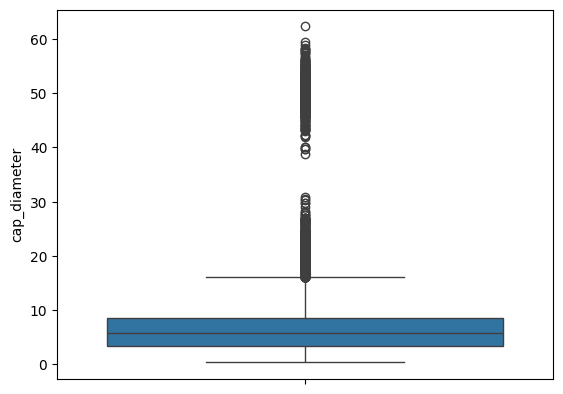

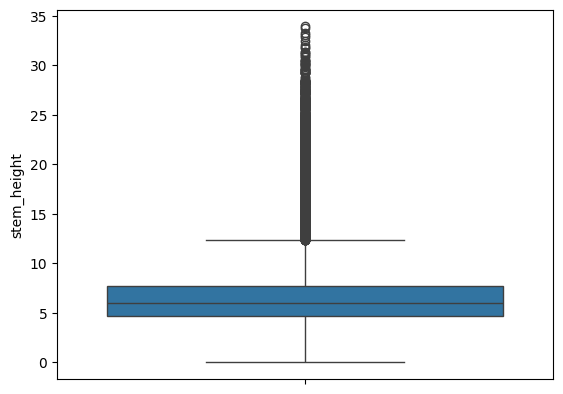

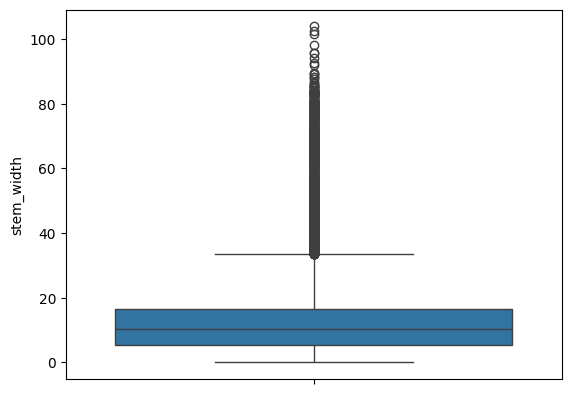

In [19]:
for col in numerical_columns:
    sns.boxplot(df[col])
    plt.show()

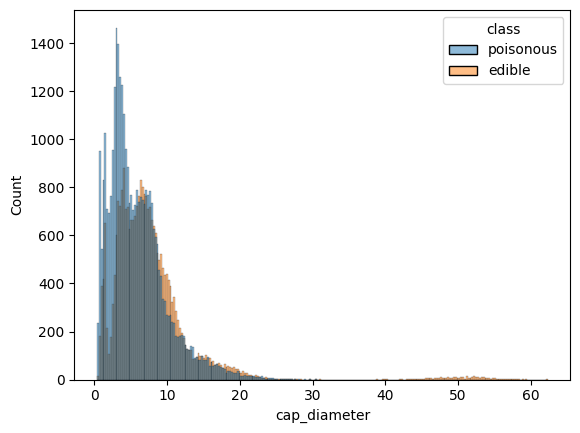

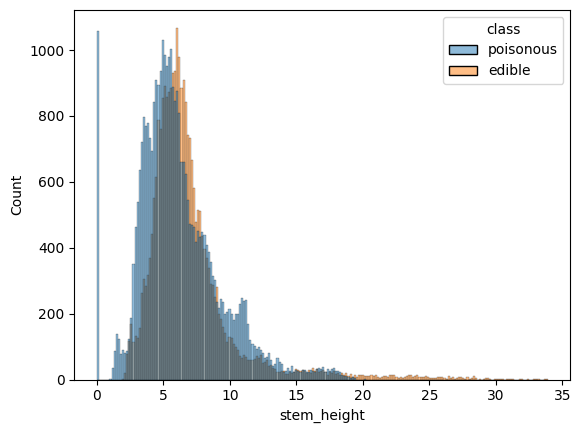

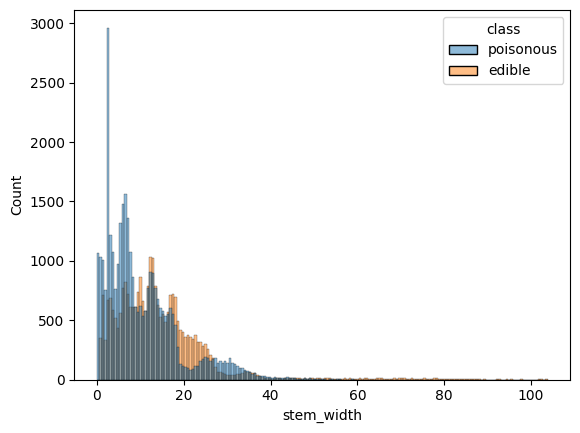

In [45]:
for col in numerical_columns:
    sns.histplot(data=df, x=col, hue='class')
    plt.show()

In [46]:
df = df.query('cap_diameter < 25 and stem_height < 20 and stem_width < 40')

In [47]:
df

,class,cap_diameter,cap_shape,cap_color,does_bruise_or_bleed,gill_color,stem_height,stem_width,stem_color,has_ring,habitat,season
0,poisonous,15.26,convex,orange,no,white,16.95,17.09,white,yes,woods,winter
1,poisonous,16.60,convex,orange,no,white,17.99,18.19,white,yes,woods,summer
2,poisonous,14.07,convex,orange,no,white,17.80,17.74,white,yes,woods,winter
3,poisonous,14.17,flat,red,no,white,15.77,15.98,white,yes,woods,winter
4,poisonous,14.64,convex,orange,no,white,16.53,17.20,white,yes,woods,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,poisonous,1.18,sunken,yellow,no,none,3.93,6.22,yellow,no,woods,autumn
61065,poisonous,1.27,flat,yellow,no,none,3.18,5.43,yellow,no,woods,autumn
61066,poisonous,1.27,sunken,yellow,no,none,3.86,6.37,yellow,no,woods,summer
61067,poisonous,1.24,flat,yellow,no,none,3.56,5.44,yellow,no,woods,summer


In [22]:
df[df['class']=='poisonous']

,class,cap_diameter,cap_shape,cap_color,does_bruise_or_bleed,gill_color,stem_height,stem_width,stem_color,has_ring,habitat,season
0,poisonous,15.26,convex,orange,no,white,16.95,17.09,white,yes,woods,winter
1,poisonous,16.60,convex,orange,no,white,17.99,18.19,white,yes,woods,summer
2,poisonous,14.07,convex,orange,no,white,17.80,17.74,white,yes,woods,winter
3,poisonous,14.17,flat,red,no,white,15.77,15.98,white,yes,woods,winter
4,poisonous,14.64,convex,orange,no,white,16.53,17.20,white,yes,woods,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,poisonous,1.18,sunken,yellow,no,none,3.93,6.22,yellow,no,woods,autumn
61065,poisonous,1.27,flat,yellow,no,none,3.18,5.43,yellow,no,woods,autumn
61066,poisonous,1.27,sunken,yellow,no,none,3.86,6.37,yellow,no,woods,summer
61067,poisonous,1.24,flat,yellow,no,none,3.56,5.44,yellow,no,woods,summer


In [21]:
df[df['class']=='edible']

,class,cap_diameter,cap_shape,cap_color,does_bruise_or_bleed,gill_color,stem_height,stem_width,stem_color,has_ring,habitat,season
1059,edible,10.42,flat,brown,yes,white,11.50,17.75,white,yes,woods,autumn
1060,edible,9.59,flat,brown,yes,white,9.87,14.71,white,yes,woods,summer
1061,edible,9.10,flat,brown,yes,white,11.45,20.24,white,yes,woods,autumn
1062,edible,8.86,convex,brown,yes,white,11.25,14.37,white,yes,woods,summer
1063,edible,9.59,convex,brown,yes,white,7.82,15.06,white,yes,woods,summer
...,...,...,...,...,...,...,...,...,...,...,...,...
60711,edible,4.67,others,brown,no,none,4.69,19.96,brown,no,woods,spring
60712,edible,7.28,conical,brown,no,none,5.29,18.54,brown,no,leaves,spring
60713,edible,6.60,spherical,brown,no,none,5.52,18.88,brown,no,leaves,spring
60714,edible,4.19,conical,brown,no,none,4.22,19.02,brown,no,woods,spring


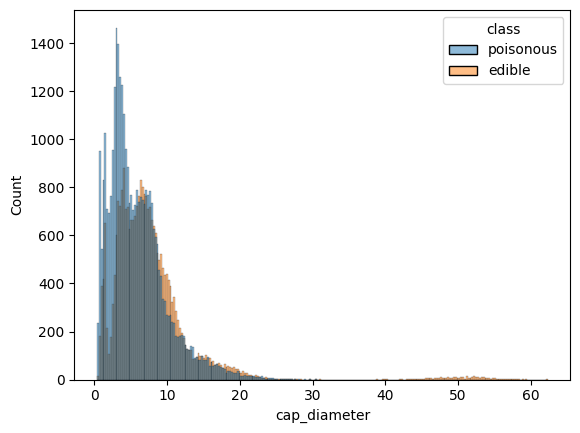

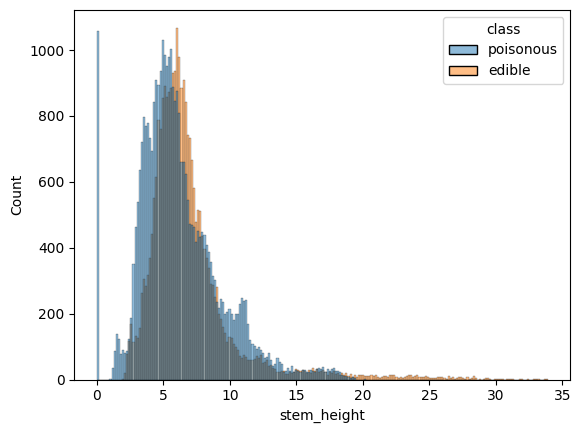

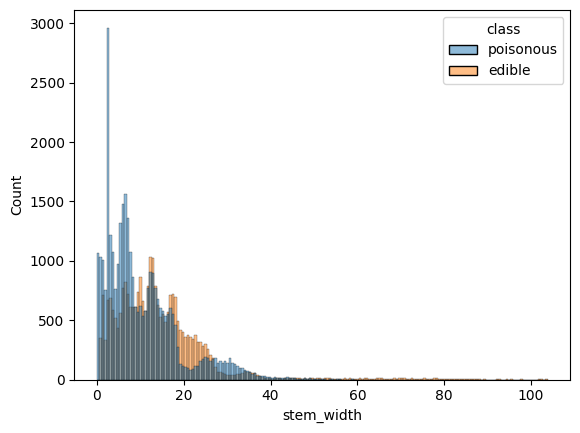

In [23]:
for col in numerical_columns:
    sns.histplot(data=df, x=col, hue='class')
    plt.show()

In [24]:
for col in object_columns:
    print(f"Column Name = {col}")
    print(df[col].value_counts())
    print("\n\n")

Column Name = class
class
poisonous    33888
edible       27181
Name: count, dtype: int64



Column Name = cap_shape
cap_shape
convex       26934
flat         13404
sunken        7164
bell          5694
others        3460
spherical     2598
conical       1815
Name: count, dtype: int64



Column Name = cap_color
cap_color
brown     24218
yellow     8543
white      7666
gray       4420
red        4035
orange     3656
green      1782
purple     1709
pink       1703
black      1279
buff       1230
blue        828
Name: count, dtype: int64



Column Name = does_bruise_or_bleed
does_bruise_or_bleed
no     50479
yes    10590
Name: count, dtype: int64



Column Name = gill_color
gill_color
white     18521
brown      9645
yellow     9546
pink       5983
gray       4118
none       3530
orange     2909
black      2375
green      1399
red        1066
purple     1023
buff        954
Name: count, dtype: int64



Column Name = stem_color
stem_color
white     22926
brown     18063
yellow     7865
gray

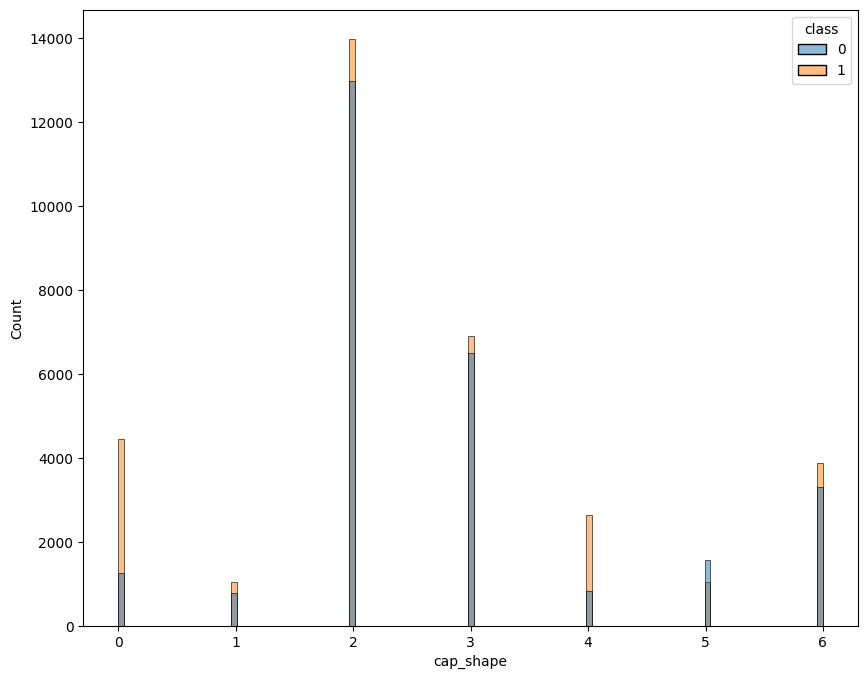

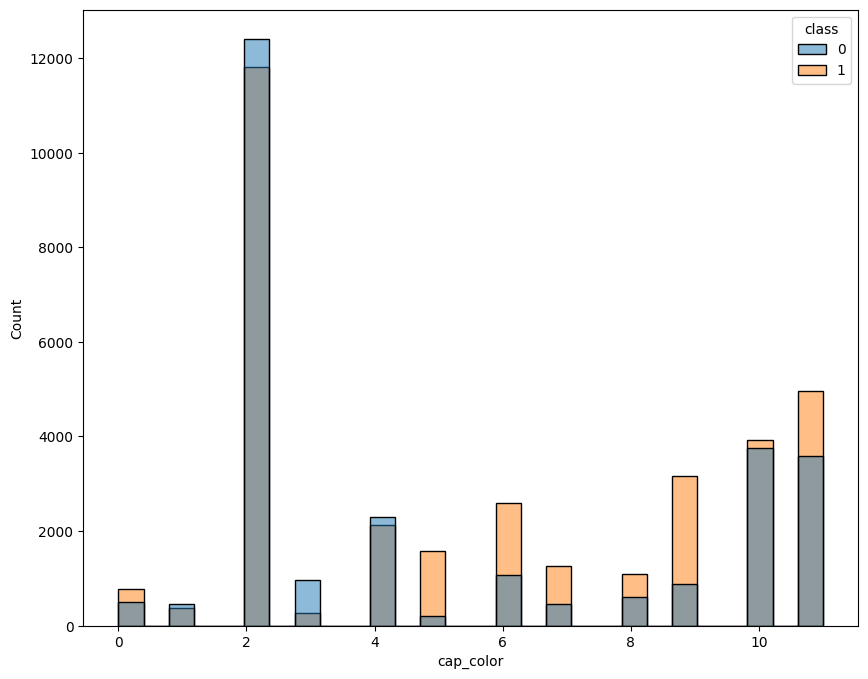

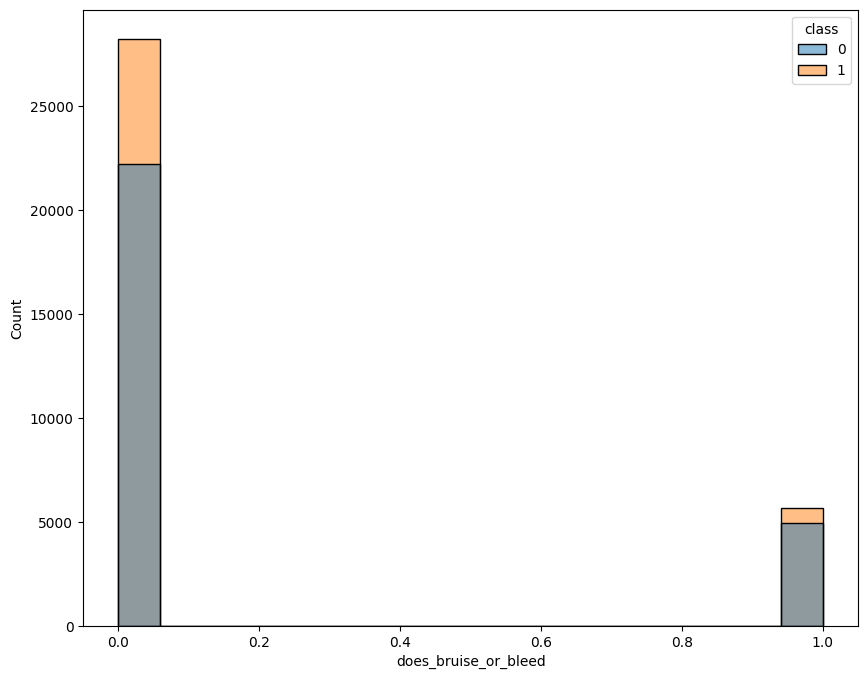

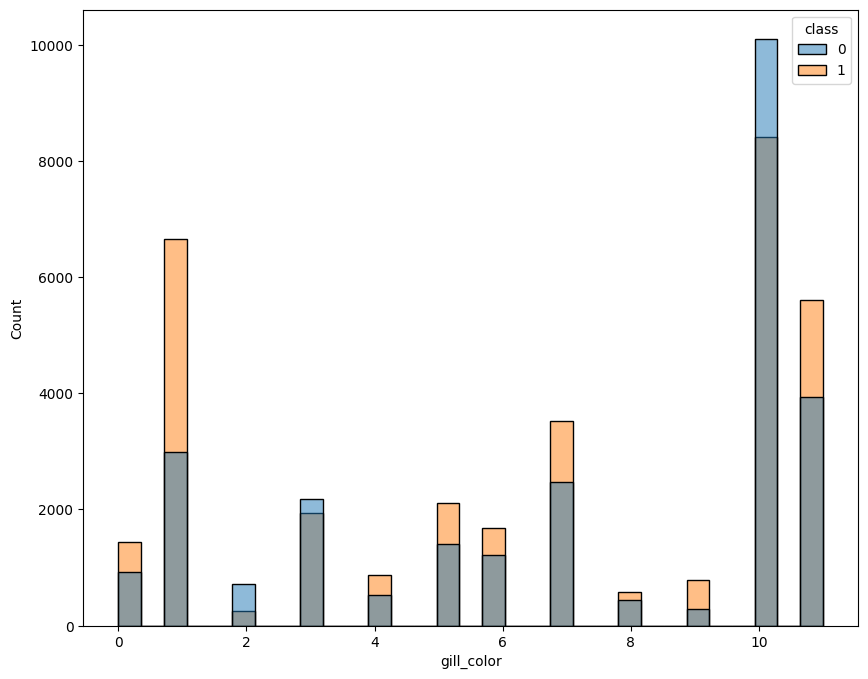

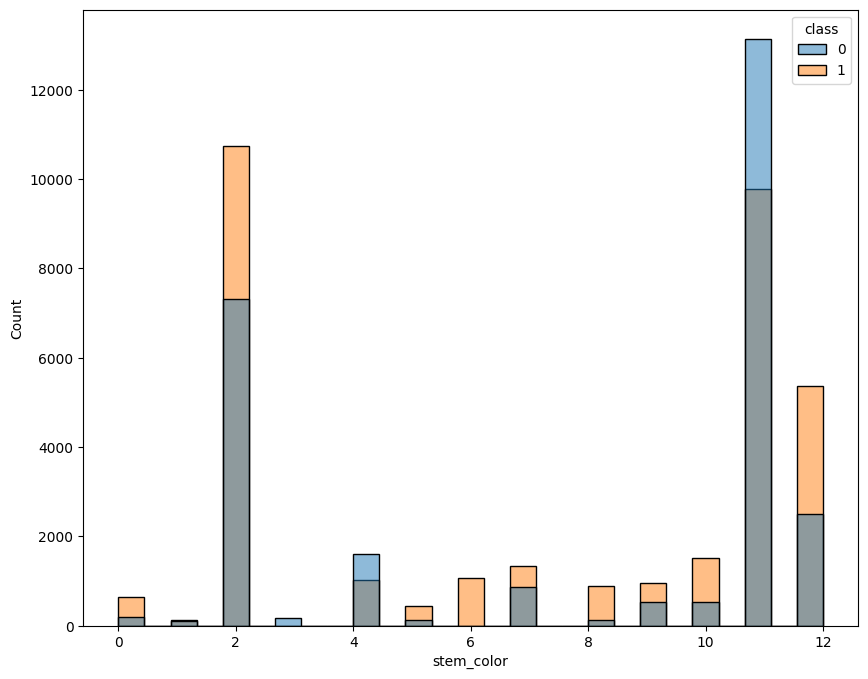

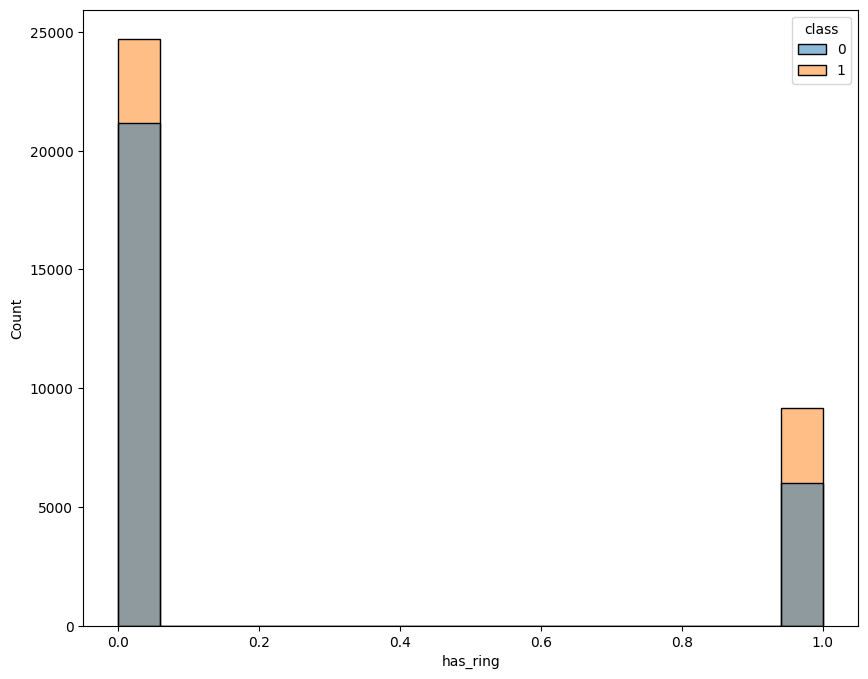

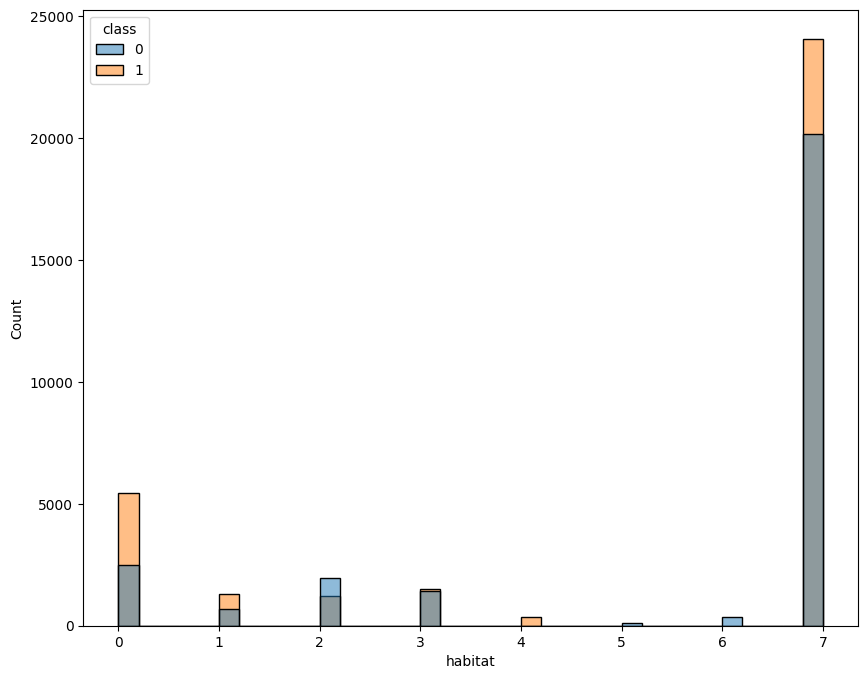

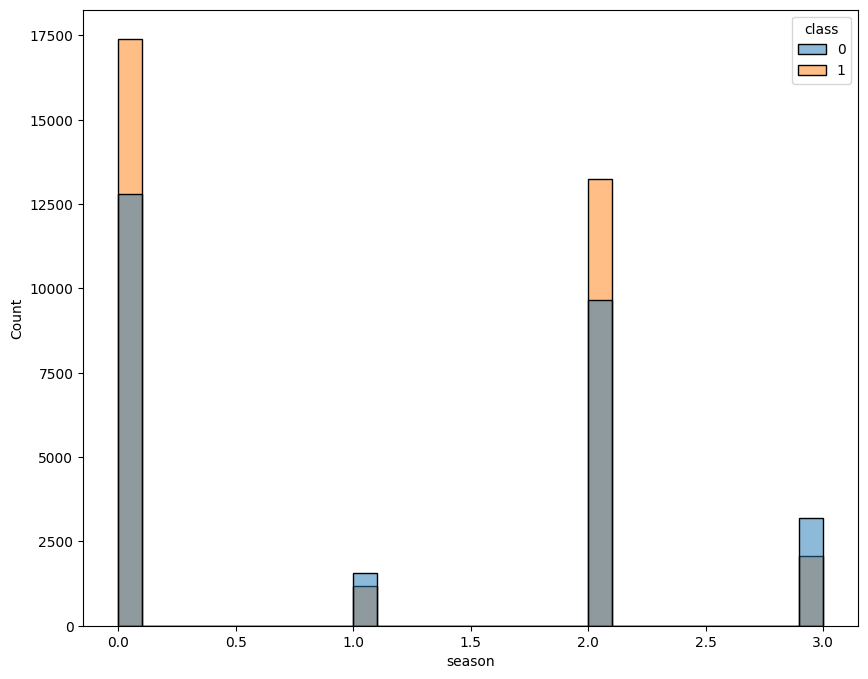

In [43]:
for col in object_columns:
    if col == 'class':
        continue
    plt.figure(figsize=(10,8))
    sns.histplot(data=df, x=col, hue='class')
    plt.show()

## Data Preprocessing - Encoding and Splitting 

In [26]:
labelencoders = {}
for i in object_columns:
  labelencoders[i] = LabelEncoder()
  df.loc[:, [i]] = labelencoders[i].fit_transform(df[i])

In [27]:
labelencoders

{'class': LabelEncoder(),
 'cap_shape': LabelEncoder(),
 'cap_color': LabelEncoder(),
 'does_bruise_or_bleed': LabelEncoder(),
 'gill_color': LabelEncoder(),
 'stem_color': LabelEncoder(),
 'has_ring': LabelEncoder(),
 'habitat': LabelEncoder(),
 'season': LabelEncoder()}

In [28]:
df.head()

,class,cap_diameter,cap_shape,cap_color,does_bruise_or_bleed,gill_color,stem_height,stem_width,stem_color,has_ring,habitat,season
0,1,15.26,2,6,0,10,16.95,17.09,11,1,7,3
1,1,16.60,2,6,0,10,17.99,18.19,11,1,7,2
2,1,14.07,2,6,0,10,17.80,17.74,11,1,7,3
3,1,14.17,3,9,0,10,15.77,15.98,11,1,7,3
4,1,14.64,2,6,0,10,16.53,17.20,11,1,7,3


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap_diameter          61069 non-null  float64
 2   cap_shape             61069 non-null  object 
 3   cap_color             61069 non-null  object 
 4   does_bruise_or_bleed  61069 non-null  object 
 5   gill_color            61069 non-null  object 
 6   stem_height           61069 non-null  float64
 7   stem_width            61069 non-null  float64
 8   stem_color            61069 non-null  object 
 9   has_ring              61069 non-null  object 
 10  habitat               61069 non-null  object 
 11  season                61069 non-null  object 
dtypes: float64(3), object(9)
memory usage: 5.6+ MB


In [30]:
for col in df:
    if df[col].dtypes == 'object':
        df.iloc[:, col] = df[col].astype('int64')

C:\Users\Bilal\AppData\Local\Temp\ipykernel_20720\1363836968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('int64')
C:\Users\Bilal\AppData\Local\Temp\ipykernel_20720\1363836968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('int64')
C:\Users\Bilal\AppData\Local\Temp\ipykernel_20720\1363836968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap_diameter          61069 non-null  float64
 2   cap_shape             61069 non-null  int64  
 3   cap_color             61069 non-null  int64  
 4   does_bruise_or_bleed  61069 non-null  int64  
 5   gill_color            61069 non-null  int64  
 6   stem_height           61069 non-null  float64
 7   stem_width            61069 non-null  float64
 8   stem_color            61069 non-null  int64  
 9   has_ring              61069 non-null  int64  
 10  habitat               61069 non-null  int64  
 11  season                61069 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 5.6 MB


In [32]:
df.head()

,class,cap_diameter,cap_shape,cap_color,does_bruise_or_bleed,gill_color,stem_height,stem_width,stem_color,has_ring,habitat,season
0,1,15.26,2,6,0,10,16.95,17.09,11,1,7,3
1,1,16.60,2,6,0,10,17.99,18.19,11,1,7,2
2,1,14.07,2,6,0,10,17.80,17.74,11,1,7,3
3,1,14.17,3,9,0,10,15.77,15.98,11,1,7,3
4,1,14.64,2,6,0,10,16.53,17.20,11,1,7,3


In [33]:
x = df.drop(columns=['class'])
y = df['class']

In [34]:
x.head()

,cap_diameter,cap_shape,cap_color,does_bruise_or_bleed,gill_color,stem_height,stem_width,stem_color,has_ring,habitat,season
0,15.26,2,6,0,10,16.95,17.09,11,1,7,3
1,16.60,2,6,0,10,17.99,18.19,11,1,7,2
2,14.07,2,6,0,10,17.80,17.74,11,1,7,3
3,14.17,3,9,0,10,15.77,15.98,11,1,7,3
4,14.64,2,6,0,10,16.53,17.20,11,1,7,3


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [37]:
models = [KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier()]

for model in models:
  print(f"Model Name:- {model}")
  print("_"*45)
  model.fit(x_train, y_train)
  y_preds = model.predict(x_test)
  print(f"Accuracy Score = {accuracy_score(y_test, y_preds)}")
  print(f"Classification Report = \n{classification_report(y_test, y_preds)}")
  print("\n\n")

Model Name:- KNeighborsClassifier()
_____________________________________________
Accuracy Score = 0.9852628131652202
Classification Report = 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5374
           1       0.99      0.98      0.99      6840

    accuracy                           0.99     12214
   macro avg       0.98      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214




Model Name:- GaussianNB()
_____________________________________________
Accuracy Score = 0.5939086294416244
Classification Report = 
              precision    recall  f1-score   support

           0       0.57      0.31      0.40      5374
           1       0.60      0.82      0.69      6840

    accuracy                           0.59     12214
   macro avg       0.59      0.56      0.55     12214
weighted avg       0.59      0.59      0.56     12214




Model Name:- DecisionTreeClassifier()
__________________________

In [38]:
selected_models = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
kf = KFold(n_splits=10, shuffle=True, random_state=42)


for model in selected_models:
    print(f"Model Name = {model}")
    cross_val_results = cross_val_score(model, x, y, cv=kf)
    print(f"Cross validation Results = \n{cross_val_results}")
    print(f"Mean Accuracy = {cross_val_results.mean()}")

Model Name = KNeighborsClassifier()
Cross validation Results = 
[0.98526281 0.98624529 0.99001146 0.98902898 0.98902898 0.9859178
 0.98902898 0.98509907 0.9880465  0.98951851]
Mean Accuracy = 0.9877188393402061
Model Name = DecisionTreeClassifier()
Cross validation Results = 
[0.98640904 0.98444408 0.98673653 0.98722777 0.98690028 0.98297036
 0.98329785 0.98526281 0.98362535 0.98607927]
Mean Accuracy = 0.9852953345221269
Model Name = RandomForestClassifier()
Cross validation Results = 
[0.9950876  0.99557884 0.99770755 0.99672507 0.99607008 0.99426887
 0.99574259 0.99688882 0.99459636 0.9950868 ]
Mean Accuracy = 0.9957752593220871


In [39]:
best_model = RandomForestClassifier()
print(f"Model Name:- {best_model}")
print("_"*45)
best_model.fit(x_train, y_train)
y_preds = best_model.predict(x_test)
print(f"Accuracy Score = {accuracy_score(y_test, y_preds)}")
print(f"Classification Report = \n{classification_report(y_test, y_preds)}")
print("\n\n")
cross_val_results = cross_val_score(best_model, x, y, cv=kf)
print(f"Cross validation Results = \n{cross_val_results}")
print(f"Mean Accuracy = {cross_val_results.mean()}")
print("\n\n")

Model Name:- RandomForestClassifier()
_____________________________________________
Accuracy Score = 0.9951694776486
Classification Report = 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




Cross validation Results = 
[0.9950876  0.9954151  0.99770755 0.99656132 0.99623383 0.99443262
 0.99574259 0.99705256 0.9950876  0.99557812]
Mean Accuracy = 0.9958898899315521





In [43]:
model_data = {'model': best_model, 'encoders': labelencoders}

In [44]:
with open('mushroom_model_data.pkl', 'wb') as obj1:
    pickle.dump(model_data, obj1)